<a href="https://colab.research.google.com/github/Wrang1eer/CSS-/blob/main/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collection 

At first we need to import all libraries that we need in our code.

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from requests import get
from bs4 import BeautifulSoup
from scipy import stats as st

There is a code to scrape 1000 pages and 20K advertisements.

In [ ]:
main_url = 'https://kolesa.kz/cars/?page=' # taken main link to parse
main = []
try: # use try/except/finally block to avoid empty or deleted pages
    for i in range(1, 1001):
        main_url = 'https://kolesa.kz/cars/?page=' + str(i)# used mail link with counter to switch pages
        print(f'Страница под номером {i}')# mark pages
        html = get(main_url, headers={"User-Agent" : "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36"})
        soup = BeautifulSoup(html.text, 'html.parser')
        cars = soup.find_all('span', class_='a-el-info-title')
        for car in cars:
            smth = {}
            main_smth = {}
            href = 'https://kolesa.kz' + car.find('a', class_='list-link ddl_product_link')['href']
            print(href)
            html2 = get(href, headers={"User-Agent" : "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36"})
            soup2 = BeautifulSoup(html2.text, 'html.parser')#
            info = soup2.find('div', class_='offer')
            name = info.find('h1', class_='offer__title').text.split()[0]
            price = info.find('div', class_='offer__price').text.strip()
            year = info.find('h1', class_ = 'offer__title').text.split()[-2]
            smth['Название'] = name
            smth['Цена'] = price
            smth['Год'] = year
            main_smth.update(smth)
            for parameter in info.find_all('dl'):
                first = parameter.dt.text.strip()
                second = parameter.dd.text.strip()
                smth[first] = second
                main_smth.update(smth)
            main.append(main_smth)
        spisok = pd.DataFrame(main)
except Exception as e:
    print(e)
finally:
print(spisok)
with pd.ExcelWriter('finalproject.xlsx') as ali: # used excel file to facilitate work
    spisok.to_excel(ali, sheet_name='first', index=False)
    ali.sheets['first'].set_column('A:A', 30)
    ali.sheets['first'].set_column('B:B', 15)
    ali.sheets['first'].set_column('C:C', 20)
    ali.sheets['first'].set_column('D:D', 20)
    ali.sheets['first'].set_column('E:E', 20)
    ali.sheets['first'].set_column('F:F', 20)
    ali.sheets['first'].set_column('G:G', 10)
    ali.sheets['first'].set_column('H:H', 20)
    ali.sheets['first'].set_column('I:I', 20)
    ali.sheets['first'].set_column('J:J', 10)
    ali.sheets['first'].set_column('K:K', 20)
    ali.sheets['first'].set_column('L:L', 20)

We convert our table from advertisements into a Excel file, because it will be better to work with Excel file or Csv file, than just with a table.
So, after that we dowloaded this file and will open with method read_excel('filename.xlsx')

# Data wrangling 
Here we will check amount of duplicates and missing values to work with our analysis further.


In [ ]:
data = pd.read_excel('/content/finalproject (1) (2).xlsx') #read_excel to open excel file with pandas
data.head() # head to print first 5 elements in data

,Название,Цена,Год,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Наличие,VIN,Аварийная/Не на ходу,Двигатель
0,Kia,13 800 000\n ₸,2019,Уральск,кроссовер,2.4 (бензин),37 000 км,автомат,слева,белый металлик,полный привод,Да,NaN,NaN,NaN,NaN
1,Toyota,31 000 000\n ₸,2016,Нур-Султан (Астана),внедорожник,4.6 (бензин),25 000 км,автомат,слева,черный,полный привод,Да,NaN,NaN,NaN,NaN
2,ВАЗ,500 000\n ₸,1997,Нур-Султан (Астана),хэтчбек,1.5 (бензин),NaN,механика,слева,NaN,передний привод,Нет,NaN,NaN,NaN,NaN
3,Land,31 500 000\n ₸,2015,Нур-Султан (Астана),внедорожник,5 (бензин),79 000 км,автомат,слева,белый,полный привод,Да,NaN,NaN,NaN,NaN
4,SsangYong,4 100 000\n ₸,2013,Алматы,кроссовер,2.3 (газ-бензин),195 000 км,механика,слева,серебристый металлик,полный привод,Да,NaN,NaN,NaN,NaN


In [ ]:
data.columns = data.columns.str.lower() #to convert(change) columns names to lower case
data.columns

Index(['название', 'цена', 'год', 'город', 'кузов', 'объем двигателя, л',
       'пробег', 'коробка передач', 'руль', 'цвет', 'привод',
       'растаможен в казахстане', 'наличие', 'vin', 'аварийная/не на ходу',
       'двигатель'],
      dtype='object')

In [ ]:
data.shape #to know columns and strings amount

(19720, 16)

In [ ]:
data.info() # to check info about DataFrame and columns, types, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19720 entries, 0 to 19719
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   название                 19720 non-null  object
 1   цена                     19720 non-null  object
 2   год                      19720 non-null  int64 
 3   город                    19720 non-null  object
 4   кузов                    19711 non-null  object
 5   объем двигателя, л       19698 non-null  object
 6   пробег                   12436 non-null  object
 7   коробка передач          19720 non-null  object
 8   руль                     19720 non-null  object
 9   цвет                     17220 non-null  object
 10  привод                   19234 non-null  object
 11  растаможен в казахстане  19720 non-null  object
 12  наличие                  768 non-null    object
 13  vin                      976 non-null    object
 14  аварийная/не на ходу     249 non-null 

In [ ]:
data.duplicated().sum() #to find amount of duplicated advertisements

6096

We decided to not to delete duplicates, because 6096 is too much


In [ ]:
#data = data.drop_duplicates().reset_index(drop = True) #drop_duplicates to delete duplicates from data and when we use reset_index the old index is added as a column, and a new sequential index is used
#data.duplicated().sum()

Processing with missing data.

In [ ]:
data.isna().sum() #to find the amount of missing values

название                       0
цена                           0
год                            0
город                          0
кузов                          9
объем двигателя, л            22
пробег                      7284
коробка передач                0
руль                           0
цвет                        2500
привод                       486
растаможен в казахстане        0
наличие                    18952
vin                        18744
аварийная/не на ходу       19471
двигатель                  19698
dtype: int64

In [ ]:
data.dropna(subset = ['объем двигателя, л', 'кузов'], inplace = True) #there is very little missing values in кузов  and объем двигателя, л, so I will delete it. 

In [ ]:
#other missing values I will fill with -1 or отс.знач 
data['пробег'].fillna('-1', inplace = True)
data['цвет'].fillna('отс.знач', inplace = True)
data['привод'].fillna('отс.знач', inplace = True)
data['наличие'].fillna('отс.знач', inplace = True)
data['аварийная/не на ходу'].fillna('отс.знач', inplace = True)
data['vin'].fillna('отс.знач', inplace = True)
data['двигатель'].fillna('отс.знач', inplace = True)
data.isna().sum() #check again the amount of missing values

название                   0
цена                       0
год                        0
город                      0
кузов                      0
объем двигателя, л         0
пробег                     0
коробка передач            0
руль                       0
цвет                       0
привод                     0
растаможен в казахстане    0
наличие                    0
vin                        0
аварийная/не на ходу       0
двигатель                  0
dtype: int64

0 missing values, good job!

But there is a one problem, that all columns have object type. 
Convert the data to the types we want.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19689 entries, 0 to 19719
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   название                 19689 non-null  object
 1   цена                     19689 non-null  object
 2   год                      19689 non-null  int64 
 3   город                    19689 non-null  object
 4   кузов                    19689 non-null  object
 5   объем двигателя, л       19689 non-null  object
 6   пробег                   19689 non-null  object
 7   коробка передач          19689 non-null  object
 8   руль                     19689 non-null  object
 9   цвет                     19689 non-null  object
 10  привод                   19689 non-null  object
 11  растаможен в казахстане  19689 non-null  object
 12  наличие                  19689 non-null  object
 13  vin                      19689 non-null  object
 14  аварийная/не на ходу     19689 non-nul

We need to convert Цена, Объем двигателя, Пробег to numbers. Цена, Пробег (to int type), Объем двигателя (to float type). 

In [ ]:
data['цена'] = data['цена'].str.replace(u'\xa0', u'').str.replace('₸', '').str.replace('\n', '') # we need to replace all extra symbols to empty space to get a type we want
data['цена']

0        13800000    
1        31000000    
2          500000    
3        31500000    
4         4100000    
             ...     
19715     1300000    
19716     9000000    
19717     3100000    
19718     4300000    
19719     2700000    
Name: цена, Length: 19689, dtype: object

In [ ]:
data['цена'] = data['цена'].astype('int') #astype to convert to type what you want
data['цена']

0        13800000
1        31000000
2          500000
3        31500000
4         4100000
           ...   
19715     1300000
19716     9000000
19717     3100000
19718     4300000
19719     2700000
Name: цена, Length: 19689, dtype: int64

In [ ]:
data['пробег'] = data['пробег'].str.replace('км', '').str.replace(' ', '') #similar situation with цена
data['пробег']

0         37000
1         25000
2            -1
3         79000
4        195000
          ...  
19715    415000
19716        -1
19717    241350
19718    120000
19719    315000
Name: пробег, Length: 19689, dtype: object

In [ ]:
data['пробег'] = data['пробег'].astype('int')
data['пробег']

0         37000
1         25000
2            -1
3         79000
4        195000
          ...  
19715    415000
19716        -1
19717    241350
19718    120000
19719    315000
Name: пробег, Length: 19689, dtype: int64

In [ ]:
data['объем двигателя, л'] = data['объем двигателя, л'].str.replace('бензин', '').str.replace('газ-', '').str.replace(r'[^\d\.]+', '', regex=True) #without regular expression like r'[^\d\.]+', '', regex=True there will be brackets
data['объем двигателя, л']

0        2.4
1        4.6
2        1.5
3          5
4        2.3
        ... 
19715    1.6
19716    2.2
19717    1.5
19718      3
19719    1.6
Name: объем двигателя, л, Length: 19689, dtype: object

In [ ]:
data['объем двигателя, л'] = data['объем двигателя, л'].astype('float') #i will convert this column to float, because there are really float numbers
data['объем двигателя, л']

0        2.4
1        4.6
2        1.5
3        5.0
4        2.3
        ... 
19715    1.6
19716    2.2
19717    1.5
19718    3.0
19719    1.6
Name: объем двигателя, л, Length: 19689, dtype: float64

In [ ]:
data.head()

,название,цена,год,город,кузов,"объем двигателя, л",пробег,коробка передач,руль,цвет,привод,растаможен в казахстане,наличие,vin,аварийная/не на ходу,двигатель
0,Kia,13800000,2019,Уральск,кроссовер,2.4,37000,автомат,слева,белый металлик,полный привод,Да,отс.знач,отс.знач,отс.знач,отс.знач
1,Toyota,31000000,2016,Нур-Султан (Астана),внедорожник,4.6,25000,автомат,слева,черный,полный привод,Да,отс.знач,отс.знач,отс.знач,отс.знач
2,ВАЗ,500000,1997,Нур-Султан (Астана),хэтчбек,1.5,-1,механика,слева,отс.знач,передний привод,Нет,отс.знач,отс.знач,отс.знач,отс.знач
3,Land,31500000,2015,Нур-Султан (Астана),внедорожник,5.0,79000,автомат,слева,белый,полный привод,Да,отс.знач,отс.знач,отс.знач,отс.знач
4,SsangYong,4100000,2013,Алматы,кроссовер,2.3,195000,механика,слева,серебристый металлик,полный привод,Да,отс.знач,отс.знач,отс.знач,отс.знач


# Data visualisation 

## Exploratory data analysis

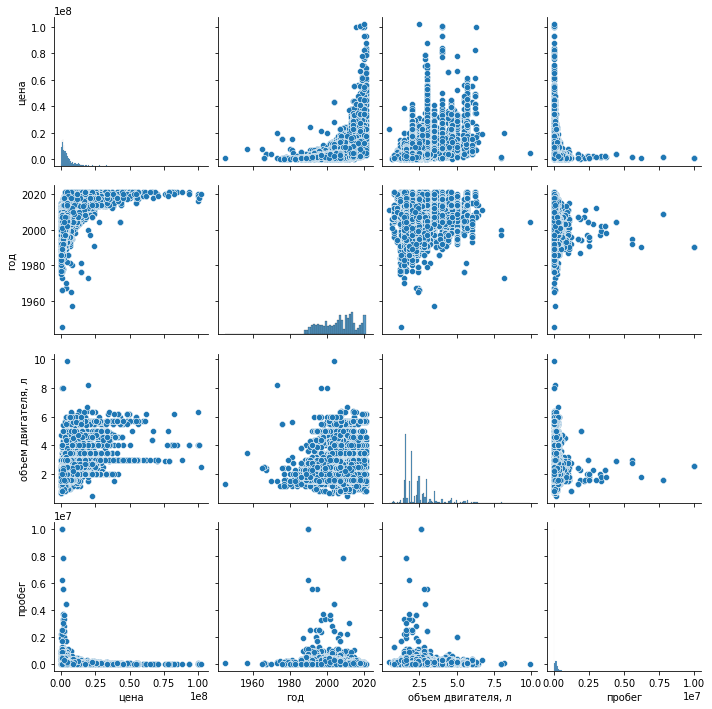

In [ ]:
sns.pairplot(data)

With sns.pairplot you can display all kinds of graphs between quantitative columns

Text(0, 0.5, 'ads amount')

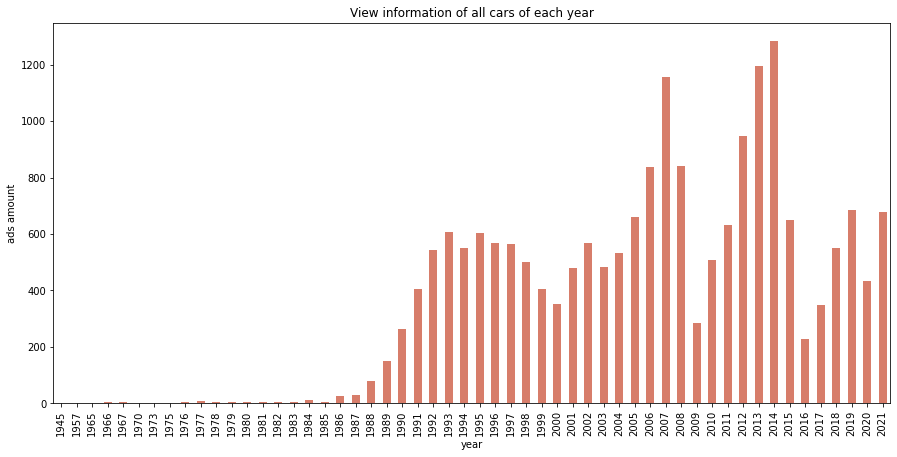

In [ ]:
data.groupby('год')['название'].count().plot(kind = 'bar', figsize = (15, 7), color = '#CD5D45', alpha = 0.8, title = 'View information of all cars of each year')
plt.xlabel('year')
plt.ylabel('ads amount')
#we drow graphic to see information about all advertisements by their year
#we used kind bar graphic, figsize is size, color is color, alpha to make the color more vivid, ec is boundaries of graph and title

We can say that there are more cars in our database that came out after 2000 than before 2000. The count of cars that came out in 2014 - maximal, second - 2013 and third 2007. Count of cars came out before 1988 - very small, which is even almost 0.

Text(0, 0.5, 'ads amount')

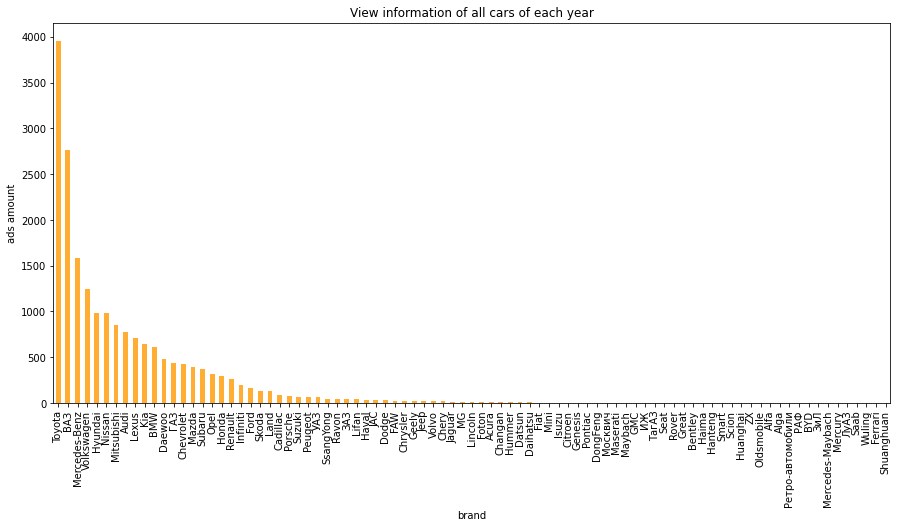

In [ ]:
data.groupby('название')['название'].count().sort_values(ascending = False).plot(kind = 'bar', figsize = (15, 7),color = '#FF9900', alpha = 0.8, title = 'View information of all cars of each year')
plt.xlabel('brand')
plt.ylabel('ads amount')
#here to see every brand's overall ads count

In this graph we can see brands by their advertisements' count, so we have took the top 6 cars by ads count.

*   Toyota
*   ВАЗ
*   Mersedes-Benz
*   Volkswagen
*   Nissan
*   Hyundai








In [ ]:
privod = data[data['привод'] != 'отс.знач'].groupby('привод')['название'].count()
privod

привод
задний привод       2876
передний привод    10809
полный привод       5518
Name: название, dtype: int64

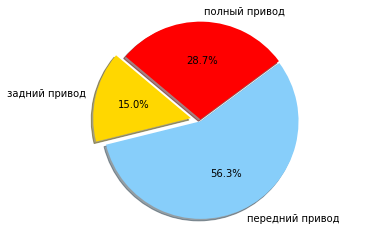

In [ ]:
colors = ['gold', 'lightskyblue', 'red']
priv = 'задний привод', 'передний привод', 'полный привод'
val = [2876, 10809, 5518]
expl = (0.1, 0.01, 0.01)
plt.pie(val, explode = expl, labels=priv, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
rastam = data.groupby('растаможен в казахстане')['название'].count()
rastam

растаможен в казахстане
Да     16706
Нет     2983
Name: название, dtype: int64

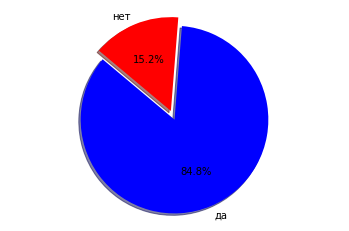

In [ ]:
colors = ['blue', 'red']
priv = 'да', 'нет'
val = [16706, 2983]
expl = (0, 0.1)
plt.pie(val, explode = expl, labels=priv, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

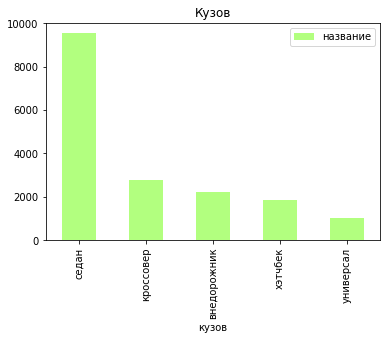

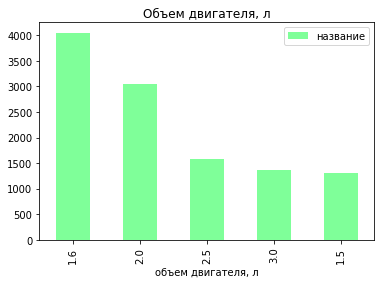

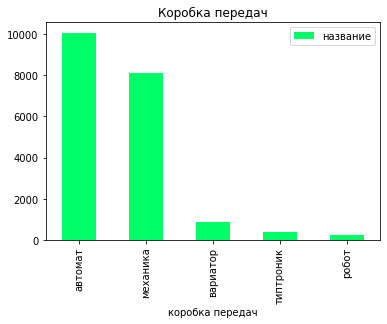

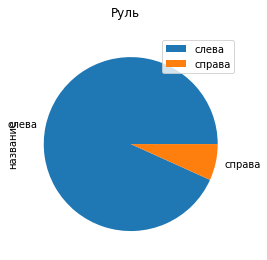

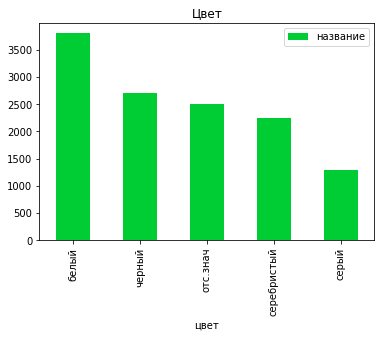

In [ ]:
data.pivot_table(index = 'кузов', values = ['название'], aggfunc = ('count')).sort_values(by = 'название', ascending = False).head().plot(kind = 'bar', color = '#B2FF7F', title = 'Кузов')
data.pivot_table(index = 'объем двигателя, л', values = ['название'], aggfunc = ('count')).sort_values(by = 'название', ascending = False).head().plot(kind = 'bar', color = '#7FFF99', title = 'Объем двигателя, л')
data.pivot_table(index = 'коробка передач', values = ['название'], aggfunc = ('count')).sort_values(by = 'название', ascending = False).plot(kind = 'bar', color = '#00FF66', title = 'Коробка передач')
data.pivot_table(index = 'руль', values = ['название'], aggfunc = ('count')).sort_values(by = 'название', ascending = False).plot(kind = 'pie', subplots = True, title = 'Руль')
data.pivot_table(index = 'цвет', values = ['название'], aggfunc = ('count')).sort_values(by = 'название', ascending = False).head().plot(kind = 'bar', color = '#00CC33', title = 'Цвет')

## Top cities by count of advertisements

In [ ]:
all_cities = ['Нур-Султан (Астана)', 'Алматы', 'Шымкент', 'Караганда', 'Талдыкорган', 'Актобе', 'Атырау', 'Актау', 'Семей', 'Усть-Каменогорск', 'Петропавловск', 'Павлодар', 'Тараз', 'Кызылорда', 'Уральск', 'Костанай', 'Туркестан']

In [ ]:
new_data = data.query('город in @all_cities')

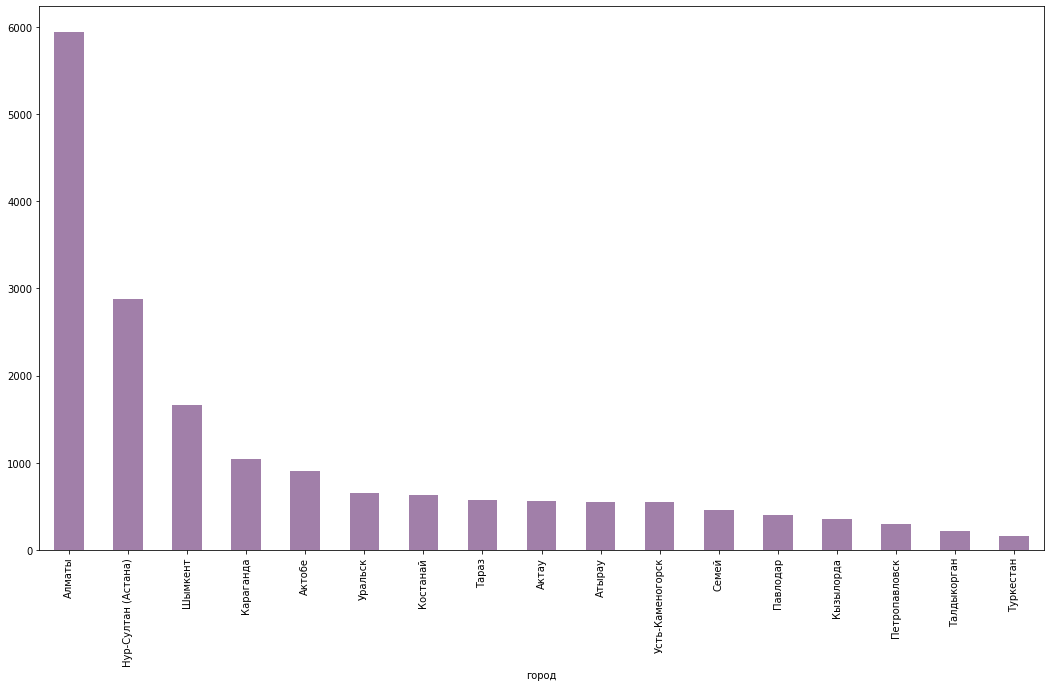

In [ ]:
amount_car_region = new_data.groupby('город')['название'].count().sort_values(ascending = False)
amount_car_region.plot(kind = 'bar', x='город',  y = 'название', figsize = (18, 10), colormap = 'viridis' , alpha = 0.5) #plot to draw a diagram with kind - bar
#amount_car_region.sort_values('название', ascending = False).plot(kind = 'bar', x='город',  y = 'название', figsize = (18, 10), colormap = 'viridis') #plot to draw a diagram with kind - bar

It can be seen that in Almaty, Astana and Shymkent they sell more cars than in other cities. The millionaire cities are immediately visible. The fourth place is occupied by Karaganda and with a difference of 32 cars it closes the top five in Aktobe, but as the diagram shows by the sum of prices, it is in Uralsk and Atyrau. Expensive cars are on sale in these two cities, but not enough.

TOP 5:

1.   Almaty
2.   Nursultan(Astana)
3.   Shymkent
4.   Karagandy
5.   Aktobe





In [ ]:
#create a list of top5 and add the names of cities that are in the top 5 there
top5 = ['Алматы', 'Нур-Султан (Астана)', 'Шымкент', 'Караганда', 'Актобе']

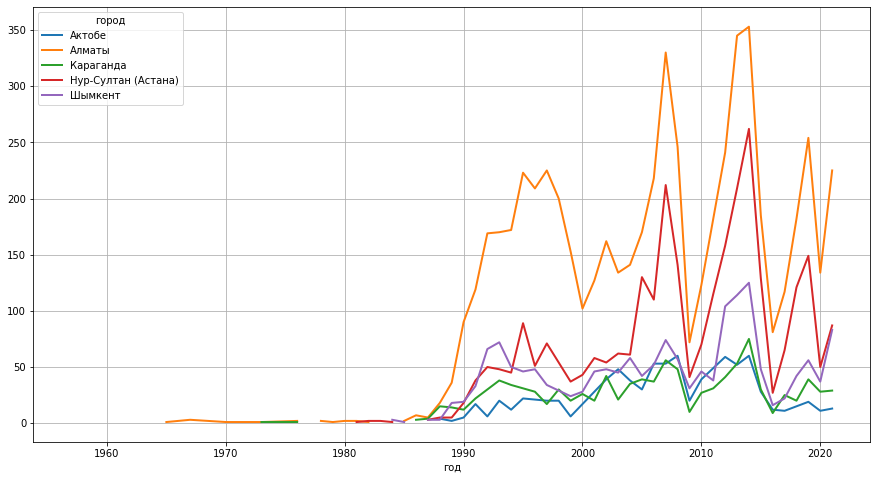

In [ ]:
top5_ads = data[data['город'].isin(top5)].pivot_table(values = 'название', index = 'год', columns = 'город',aggfunc = 'count') #isin(top5) is the function that takes cities which in the top5 list, pivot_table is to create a new table by the index, values and usable function to these values
top5_ads.plot(figsize = (15, 8), lw = 2, alpha = 1)
plt.title('', fontsize = 20)
plt.grid(True)
plt.show()

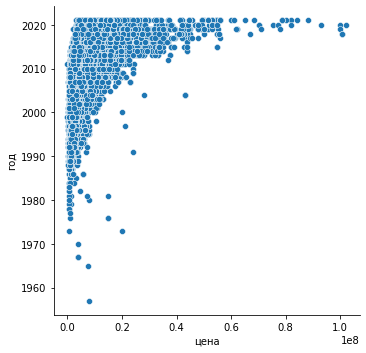

In [ ]:
top5_data = data.query('город in @top5')
sns.relplot(x = 'цена', y = 'год', data = top5_data) 

  **Since 2009, there has been the biggest decline, so we considerer to do analysis from this year.**

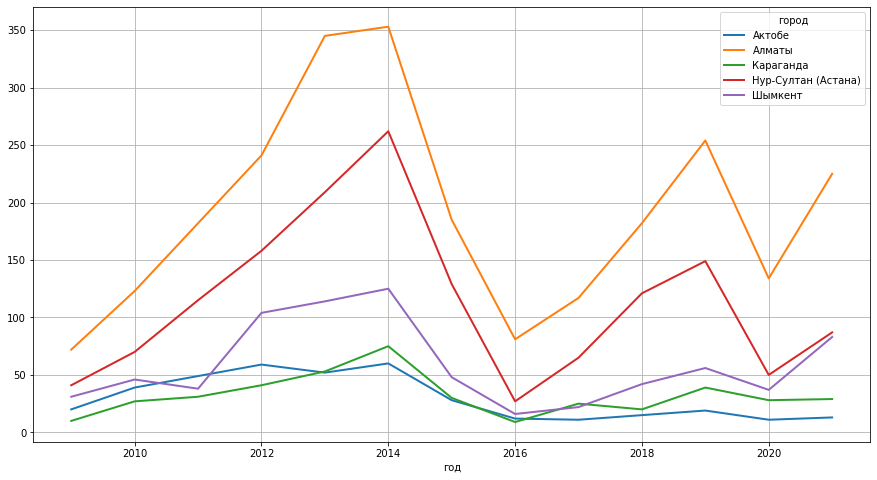

In [ ]:
top5_ads = data[data['город'].isin(top5) & (data['год'] >= 2009)].pivot_table(values = 'название', index = 'год', columns = 'город',aggfunc = 'count')
top5_ads.plot(figsize = (15, 8), lw = 2, alpha = 1)
plt.title('', fontsize = 20)
plt.grid(True)
plt.show()

In 2014 there was a maximal count of ads in each 5 city and before 2010 there was a minimal value of count.

In [ ]:
x = top5_data[top5_data['цена'] >= 8500000].pivot_table(index = 'город', values = ['название'], aggfunc = ('count')).reset_index().sort_values(by = 'название', ascending = False)
x.columns = ['город', 'количество']
y = top5_data[top5_data['цена'] <= 8500000].pivot_table(index = 'город', values = ['название'], aggfunc = ('count')).reset_index().sort_values(by = 'название', ascending = False)
y.columns = ['город', 'количество']
print('Amount of all cars in the top 5 cities that cost less than 8.5 mln \n', x)
print()
print('Amount of all cars in the top 5 cities that cost more than 8.5 million \n', y)

Amount of all cars in the top 5 cities that cost less than 8.5 mln 
                  город  количество
1               Алматы        1496
3  Нур-Султан (Астана)         637
4              Шымкент         287
2            Караганда         163
0               Актобе         102

Amount of all cars in the top 5 cities that cost more than 8.5 million 
                  город  количество
1               Алматы        4487
3  Нур-Султан (Астана)        2267
4              Шымкент        1385
2            Караганда         889
0               Актобе         811


We set a specific price as a limitation to see if there are more cars sold that cost less than 8.5 million or more. The answer is: there are more cars that costs more than 8.5 million than less.

## Top 6 cars

In [ ]:
top_6car = ['Toyota', 'ВАЗ', 'Mercedes-Benz', 'Volkswagen', 'Nissan', 'Hyundai']

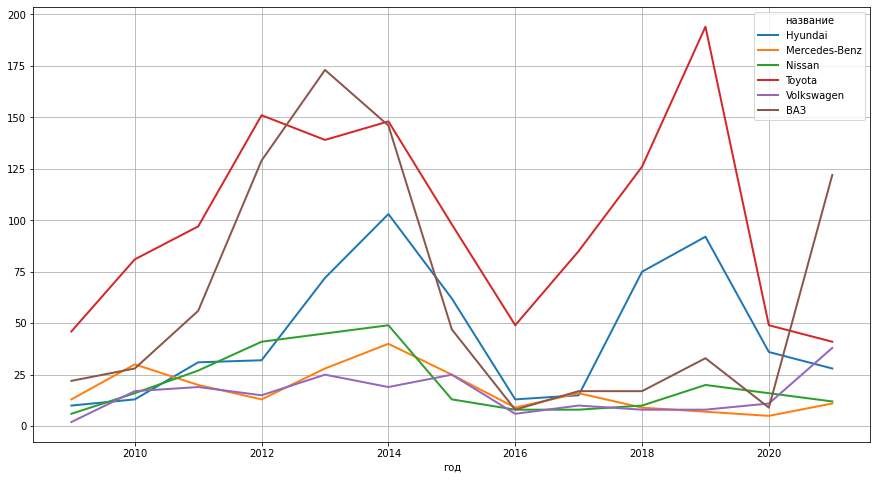

In [ ]:
top6_ads = data[(data['название'].isin(top_6car))&(data['город'].isin(top5)&(data['год'] >= 2009))].pivot_table(values = 'город', index = 'год', columns = 'название',aggfunc = 'count')
top6_ads.plot(figsize = (15, 8), lw = 2, alpha = 1)
plt.title('', fontsize = 20)
plt.grid(True)
plt.show()

We can see that in 2003 year Vaz's count of ads was more than our leader's(Toyota).

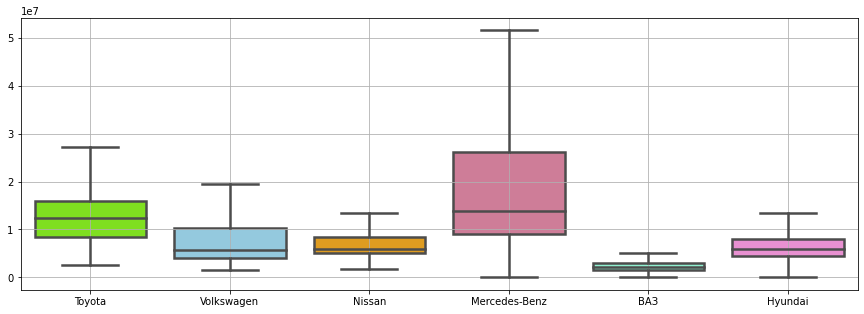

In [ ]:
plt.figure(figsize=(15,5))
colors = ['#7FFF00', '#87CEEB', '#FFA500', '#DB7093', '#7FFFD4', '#F781D8']
sns.boxplot(x = 'название', y = 'цена', data = data.query('название in @top_6car & год >= 2009'), showfliers = False, palette = colors, linewidth = 2.5)
plt.title('', fontsize = 20)
plt.ylabel('')
plt.xlabel('')
plt.grid()
plt.show()

Medians of Volkswagen, Nissan and hyundai are almost same. Mercedes's mediana is the max among all, it's higher than Toyota's and VAZ's mediana is the min. 

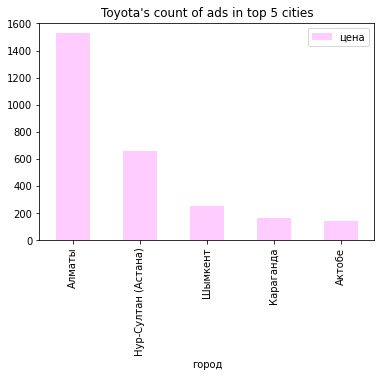

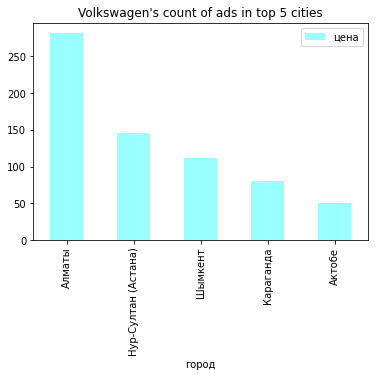

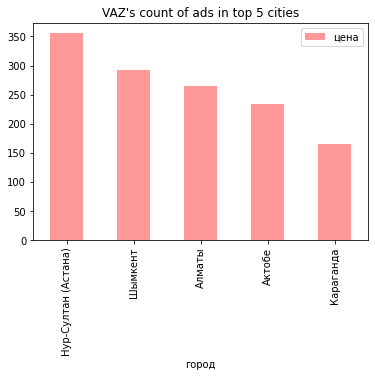

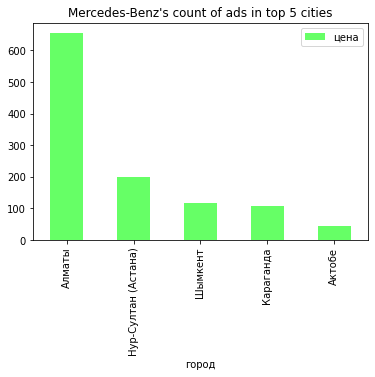

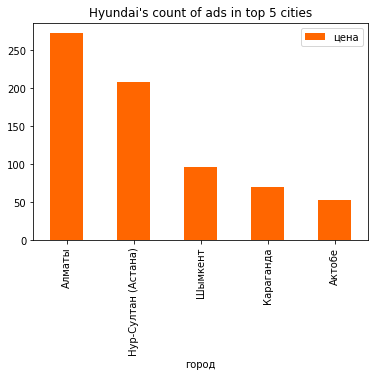

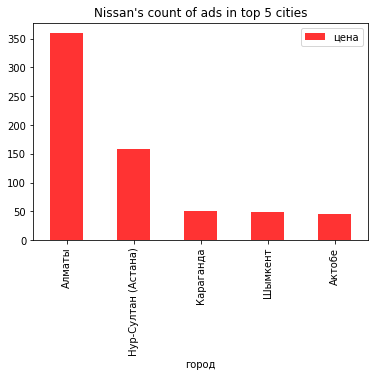

In [ ]:
pass_t = top5_data[top5_data['название'] == 'Toyota'].pivot_table(index = 'город', values = ['цена'], aggfunc = ('count')).sort_values(by = 'цена', ascending = False).plot(kind = 'bar', title = "Toyota's count of ads in top 5 cities", color = '#FFCCFF')
pass_vo = top5_data[top5_data['название'] == 'Volkswagen'].pivot_table(index = 'город', values = ['цена'], aggfunc = ('count')).sort_values(by = 'цена', ascending = False).plot(kind = 'bar', title = "Volkswagen's count of ads in top 5 cities", color = '#99FFFF')
pass_v = top5_data[top5_data['название'] == 'ВАЗ'].pivot_table(index = 'город', values = ['цена'], aggfunc = ('count')).sort_values(by = 'цена', ascending = False).plot(kind = 'bar', title = "VAZ's count of ads in top 5 cities", color = '#FF9999')
pass_m = top5_data[top5_data['название'] == 'Mercedes-Benz'].pivot_table(index = 'город', values = ['цена'], aggfunc = ('count')).sort_values(by = 'цена', ascending = False).plot(kind = 'bar', title = "Mercedes-Benz's count of ads in top 5 cities", color = '#66FF66')
pass_h = top5_data[top5_data['название'] == 'Hyundai'].pivot_table(index = 'город', values = ['цена'], aggfunc = ('count')).sort_values(by = 'цена', ascending = False).plot(kind = 'bar', title = "Hyundai's count of ads in top 5 cities", color = '#FF6600')
pass_n = top5_data[top5_data['название'] == 'Nissan'].pivot_table(index = 'город', values = ['цена'], aggfunc = ('count')).sort_values(by = 'цена', ascending = False).plot(kind = 'bar', title = "Nissan's count of ads in top 5 cities", color = '#FF3333')


Here we draw a graphic like a portait for each car in top 6 list, to see where more cars are sold with a certain car brand.
All graphs looks similar except VAZ's, VAZ sold the most in Nursultan.

# Data analysis.

Chech hypothesis that we have.


1.    The average price of cars in Almaty and Astana are the same.
2.   The average price of all cars of brand Nissan and Hyundai are equal.





*   H0: The average price of cars in Almaty and Astana are the same.
*   H1: The average price of cars in Almaty and Astana are not the same.




In [ ]:
tc = ['Алматы', 'Нур-Султан (Астана)']
a = data.query('город in @tc')

In [ ]:
almaty = data.query('город == "Алматы"')
astana = data.query('город =="Нур-Султан (Астана)"')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


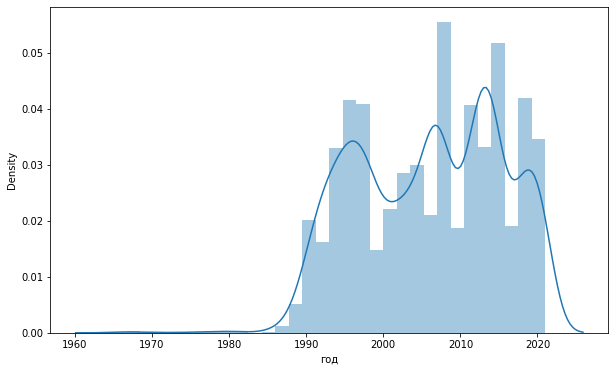

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(almaty['год'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


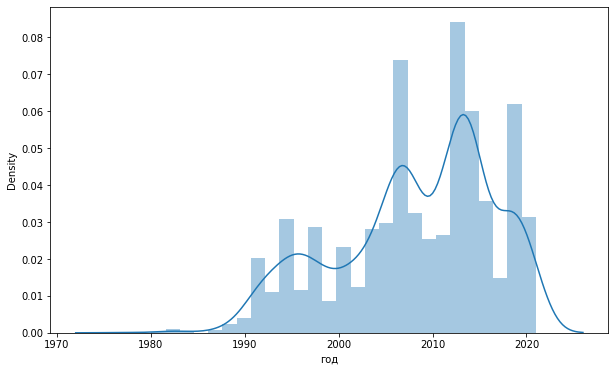

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(astana['год'])

Two graphs look similar, maybe H0 is right?

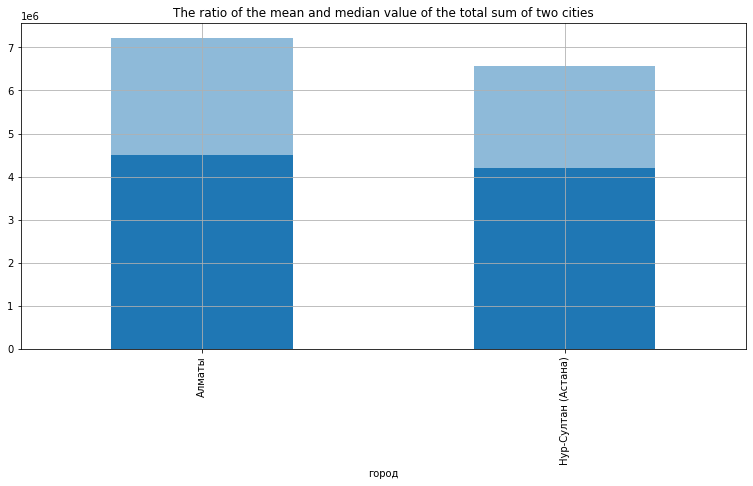

In [ ]:
mean = a.groupby('город')['цена'].mean()
median = a.groupby('город')['цена'].median()
ax = mean.plot(y = 'город', figsize = (13,6), kind = 'bar', label = 'mean', alpha = 0.5)
median.plot(y = 'город', grid = True, figsize = (13,6), kind = 'bar', label = 'median', ax = ax, title = 'The ratio of the mean and median value of the total sum of two cities')
#to see a ratio between median and mean values of two cities in a graph

In [ ]:
alpha = .05 
#alpha is the statistical value to check mean values of two sample scores
result=st.ttest_ind(almaty['цена'],astana['цена'],equal_var=False)
#since almaty and astana are independent sample scores, we can use t-test - st.ttest_ind
print('p-value:', result.pvalue)
if result.pvalue<alpha:
    print('Rejecting the null hypothesis')
else:
    print('Rejecting the null hypothesis failed')

p-value: 0.0008258425150215517
Rejecting the null hypothesis


In [ ]:
a_mean = a.query('город == "Алматы" or город == "Нур-Султан (Астана)"')
a_mean.pivot_table(index='город', values='цена', aggfunc='mean')

,цена
город,
Алматы,7.207575e+06
Нур-Султан (Астана),6.578472e+06


Really, they are not the same

The average price of all cars of brand Nissan and Hyundai are equal.


*   H0: The average price of all cars of brand Nissan and Hyundai are equal.
*   H1: The average price of all cars of brand Nissan and Hyundai are not equal.



In [ ]:
tb = ['Nissan', 'Hyundai']
b = data.query('название in @tb')

In [ ]:
nissan = data.query('название == "Nissan"')
hyundai = data.query('название == "Hyundai"')

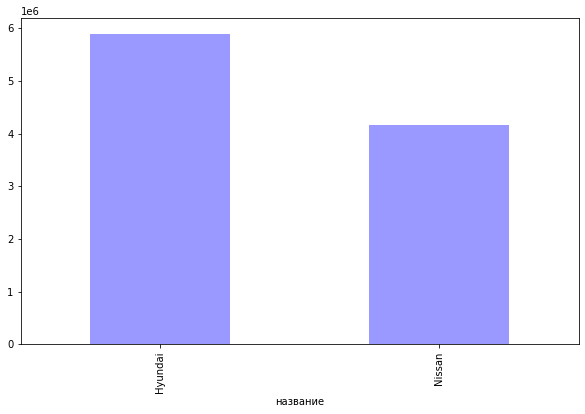

In [ ]:
mean = b.groupby('название')['цена'].mean()
mean.plot(kind = 'bar', color = '#9999FF', figsize = (10, 6))

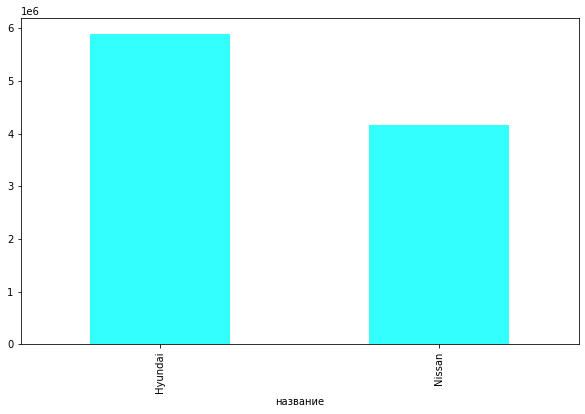

In [ ]:
median = b.groupby('название')['цена'].mean()
median.plot(kind = 'bar', color = '#33FFFF', figsize = (10, 6))

In [ ]:
alpha = .05
result=st.ttest_ind(nissan['цена'],hyundai['цена'],equal_var=False) 
print('p-value:', result.pvalue)
if result.pvalue<alpha:
    print('Rejecting the null hypothesis')
else:
    print('Rejecting the null hypothesis failed')

p-value: 8.731207326449334e-30
Rejecting the null hypothesis


In [ ]:
b_mean = b.query('название == "Nissan" or название == "Hyundai"')
b_mean.pivot_table(index='название', values='цена', aggfunc='mean')

,цена
название,
Hyundai,5.899037e+06
Nissan,4.163981e+06


This is why our code rejected the hypothesis, because they aren't same.

In [ ]:
av = np.var(data, ddof = 1)
print('variance of data:')
print(av)

variance of data:
цена                  5.712121e+13
год                   8.214362e+01
объем двигателя, л    8.686318e-01
пробег                5.231207e+10
dtype: float64


Variance of numeric columns is big, so values in this columns are very different from each other.

#Conclusion

**About general ad research**. Looking at the analysis that we conducted with the help of graphs and tables.
• Before analyzing the data, we prepared our data, brought the columns to the correct data, cleared them of omissions, and brought the required columns to the correct data types.
• After conducting an analysis, we found that the number of cars since 2009 has been the most popular and cars produced before 2000 are rapidly falling, and in the future will be equal to 0.
• For the period since 2009, the most popular were: 'Toyota', 'VAZ', 'Mercedes-Benz', 'Volkswagen', 'Nissan', 'Hyundai'.
• While the cities with the most ads are:
'Almaty', ' Nur-Sultan (Astana)', 'Shymkent', 'Karaganda', 'Aktobe'.
• The most popular brand is 'Toyota'.
• After that, we found out the passport for each brand.
• Almaty is the leader for almost all brands.
• Made several comparisons using hypotheses.

**Result**. We were able to find out the most popular brand, the platform for sales. We determined the most equal brands in terms of characteristics.

